In [3]:
import numpy as np
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.linear_model import LogisticRegression
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

2022-04-30 23:51:02.431039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-30 23:51:02.431063: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# Get images' names
non_demented = glob('./data/Non_Demented/*.jpg')
mild_demented = glob('./data/Mild_Demented/*.jpg')
moderate_demented = glob('./data/Moderate_Demented/*.jpg')
very_mild_demented = glob('./data/Very_Mild_Demented/*.jpg')
num_classes = 4
image_size = (108,108)

In [6]:
def view_image(filename):
    img = mpimg.imread(filename)
    img = img[10:118, 10:118]
    plt.imshow(img)
    print(f'Image shape: {img.shape}')


In [7]:
print(f'Total amount of non_demented: {len(non_demented)}')
# view_image(non_demented[0])

Total amount of non_demented: 3200


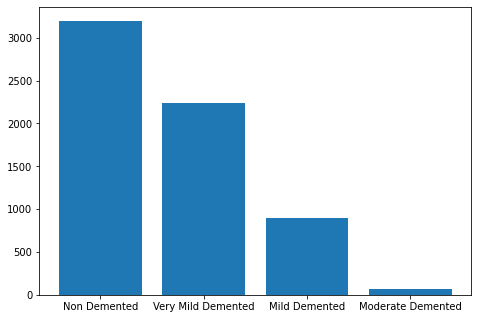

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [len(non_demented), len(very_mild_demented), len(mild_demented), len(moderate_demented)]
class_names = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']
ax.bar(class_names,size)
plt.show()

In [9]:
# np.set_printoptions(threshold=np.inf)
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img[10:118, 10:118] # photoshopping some values to avoid GPU going brrr
    img = img / 255.0  # normalize pixel values
    # print(img.shape)
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    return img

# print(extract_feature("data/Non_Demented/non.jpg"))
all_data =  np.array([extract_feature(filename) for filename in non_demented] + \
            [extract_feature(filename) for filename in mild_demented] + \
            [extract_feature(filename) for filename in moderate_demented] + \
            [extract_feature(filename) for filename in very_mild_demented])
#Fix this later
y = np.array([0] * len(non_demented) + [1] * len(mild_demented) + [2] * len(moderate_demented) + [3] * len(very_mild_demented))
X_train, X_rem, y_train, y_rem = train_test_split(all_data, y, train_size = 0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, train_size = 0.5)
# print(f"Length of training set: {len(X_train)}")
# print(f"Length of validation set: {len(X_valid)}")
# print(f"Length of test set: {len(X_test)}")
X_train_collapse = X_train.reshape(X_train.shape[0], -1)
X_valid_collapse = X_valid.reshape(X_valid.shape[0], -1)
X_test_collapse = X_test.reshape(X_test.shape[0], -1)

In [15]:
# SVM
from sklearn import svm

# Can try out different kernel functions
svc = svm.SVC(probability=False, kernel="linear")
svc.fit(X_train_collapse, y_train)

yhat_train = svc.predict(X_train_collapse)
acc = np.mean(yhat_train == y_train)
print('Accuaracy = {0:f}'.format(acc))

In [ ]:
# Neural Networks (CNN)
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

MRI_model = Sequential()
MRI_model.add()

ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' (/home/aneesh/.local/lib/python3.10/site-packages/keras/layers/normalization/__init__.py)

In [10]:
# Logistic Regression

# activation functions 

print(X_train_collapse.shape)
print(X_valid_collapse.shape) 
print(X_test_collapse.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

#used sag solver
#set iterations to 100 first

logreg = LogisticRegression(max_iter=100, multi_class="multinomial", solver="sag")
logreg.fit(X_train_collapse, y_train)
y_val_pred = logreg.predict(X_valid_collapse)

(5120, 49152)
(640, 49152)
(640, 49152)
(5120,)
(640,)
(640,)


/home/aneesh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
# Tests

# Also do the logreg classification tests 

yhat = logreg.predict(X_train_collapse)
acc = np.mean(yhat == y_train)
print('Accuaracy = {0:f}'.format(acc))

yhat_val = logreg.predict(X_valid_collapse)
acc = np.mean(yhat_val == y_valid)
print('Accuaracy = {0:f}'.format(acc))

yhat_test = logreg.predict(X_test_collapse)
acc = np.mean(yhat_test == y_test)
print('Accuaracy = {0:f}'.format(acc))

# Data logging


Accuaracy = 0.998437
Accuaracy = 0.954688
Accuaracy = 0.945312


In [39]:
# For fun, PCA

In [ ]:
# FOR EVEN MORE FUN, get the average brain scan